In [1]:
import lime
import pickle
import pandas as pd
import shap
pd.set_option('display.max_colwidth', None)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def load_data(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)
        return data

# Explicabilité BA4

In [4]:
test_df = pd.read_csv('Step3/explainability_results/shap/BA4/explain_data.csv', index_col=0)

In [5]:
test_df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,y_true,y_pred
167907,-1.367890,4.051556,-2.335459,-1.245049,-1.216570,1.937846,4.441804,3.014922,4.558980,5.714968,...,4.589041,0.764142,3.665891,-1.788444,-1.527057,-0.541394,-0.578978,1.760764,1,0
114573,1.280563,-0.942536,1.409791,1.288521,1.027880,-0.523617,-0.645952,-0.703573,0.627795,1.070173,...,-0.553289,-0.894379,-0.264605,-0.336772,-0.410327,0.292522,0.427113,-0.719005,1,1
93273,-0.505139,-0.769553,-0.281326,-0.379477,-0.602874,-0.771194,-0.346163,-0.427553,-0.515405,-0.477948,...,-0.199345,1.599793,-0.680190,1.104360,0.441235,-0.620015,-0.793199,0.509018,1,0
5,-0.781545,0.167270,-0.780013,-0.809193,-0.748757,-0.106676,0.206870,0.469626,-0.209935,-0.171687,...,-0.920782,-0.158355,0.847321,-1.162420,-1.030326,0.145756,-0.141627,-2.566058,0,0
66819,-0.425431,1.918597,-0.798450,-0.674682,-0.213125,1.108980,2.248018,3.678804,-0.596513,0.274259,...,0.349732,-0.221184,-0.090274,0.315782,-0.177946,-0.462969,-0.347172,0.724744,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33482,0.526229,-0.814092,0.644373,0.555552,0.404294,-0.383572,-0.711755,-0.630304,-0.435772,-0.488094,...,-0.220675,0.697294,-0.425047,0.749919,1.295033,-0.515874,-1.119049,-0.146023,0,0
91439,1.706911,-0.624864,1.865993,1.626460,1.376805,-0.657155,-0.604711,-0.237497,-0.498348,-0.422925,...,2.488391,1.889164,1.829563,-0.514382,-0.273056,-1.023307,-1.293363,1.338410,1,1
90691,1.461583,-0.494880,1.543509,1.450903,1.283052,-0.226147,-0.718448,-0.682169,-0.321976,-0.448572,...,-0.221986,-0.566202,-0.313313,-0.203934,-0.157172,0.228701,0.022482,0.330566,1,1
109907,-1.451074,-0.398144,-1.293019,-1.391180,-1.472697,-0.686474,-0.482503,-0.299805,-0.273084,-0.347276,...,-0.387157,-0.805291,0.333606,-1.610930,-1.238486,0.790892,0.844044,-0.631675,1,1


In [6]:
X_test = test_df.iloc[:, :-2]

## Interpretabilité Globale

In [7]:
explainer = load_data('Step3/explainability_results/shap/BA4/gradient_boosting/explainer.pkl')

In [8]:
shap_values = load_data('Step3/explainability_results/shap/BA4/gradient_boosting/shap_values.pkl')

In [30]:
exp_shap_values = explainer(X_test)

  0%|          | 0/100 [00:00<?, ?it/s]

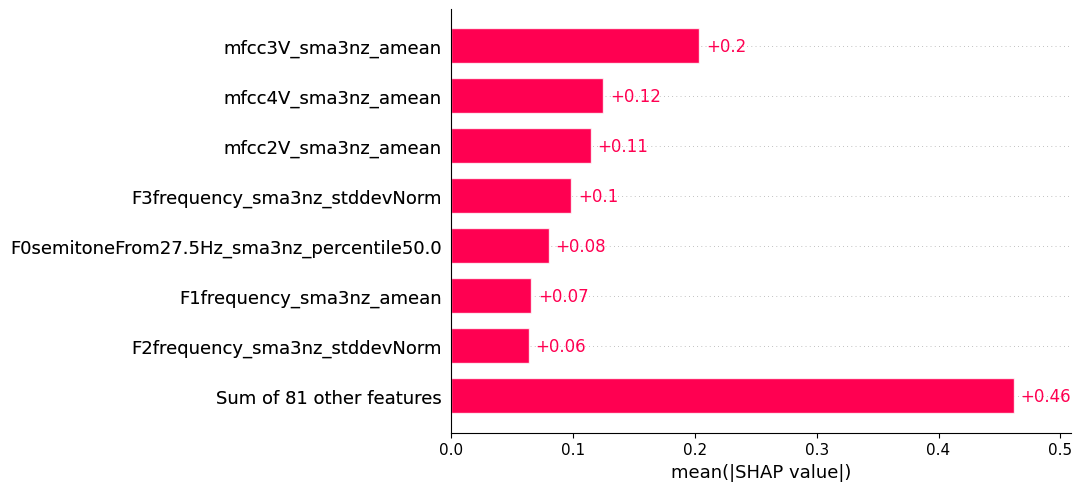

In [32]:
shap.plots.bar(exp_shap_values, max_display=8)

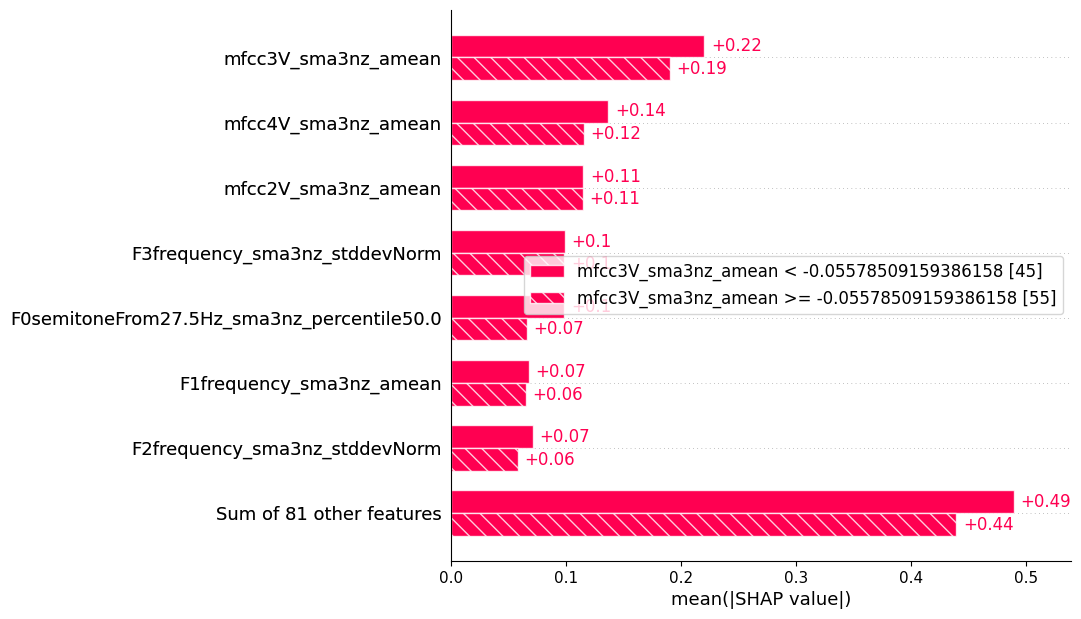

In [33]:
shap.plots.bar(exp_shap_values.cohorts(2).abs.mean(0), max_display=8)

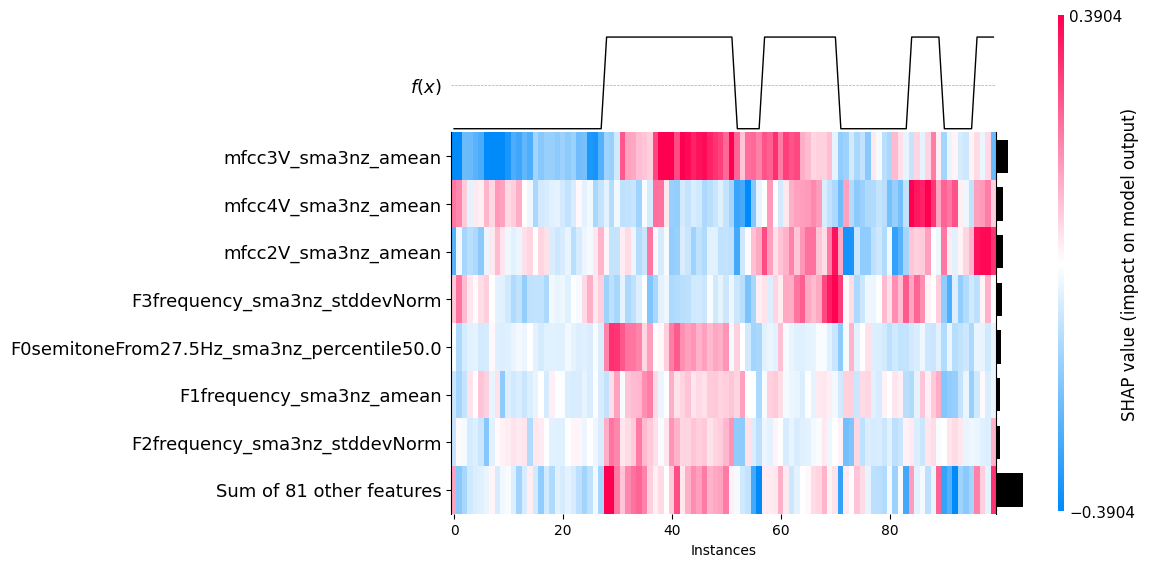

In [36]:
shap.plots.heatmap(exp_shap_values, max_display=8)

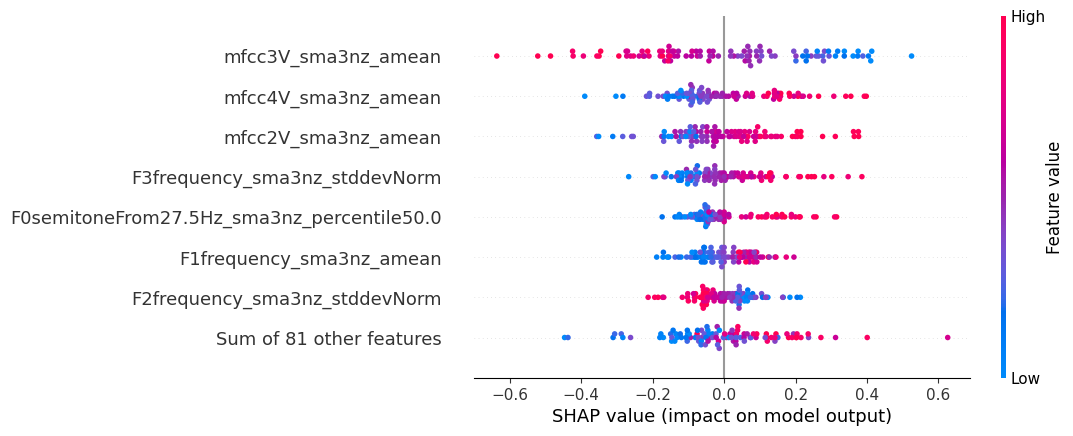

In [38]:
shap.plots.beeswarm(exp_shap_values, max_display=8)

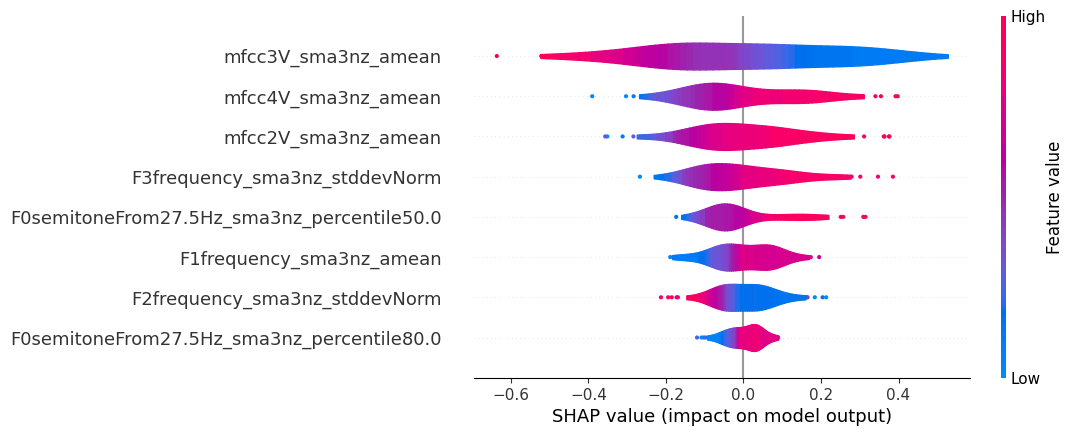

In [42]:
shap.plots.violin(exp_shap_values, max_display=8)

In [11]:
test_df.columns

Index(['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
       'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
       'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
       'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
       'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
       'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0',
       'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0',
       'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope',
       'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope',
       'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'mfcc1_sma3_stddevNorm', 'mfcc2_

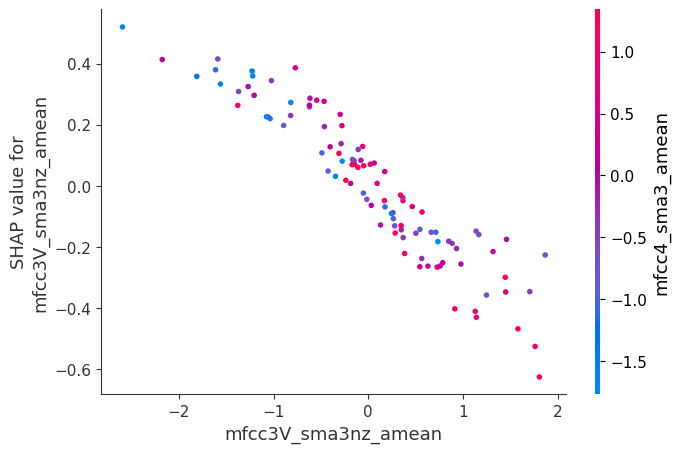

In [12]:
shap.dependence_plot('mfcc3V_sma3nz_amean', shap_values, X_test)

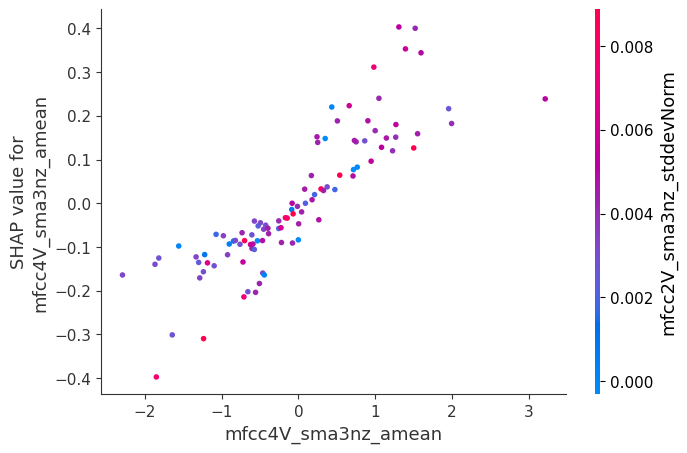

In [13]:
shap.dependence_plot('mfcc4V_sma3nz_amean', shap_values, X_test)

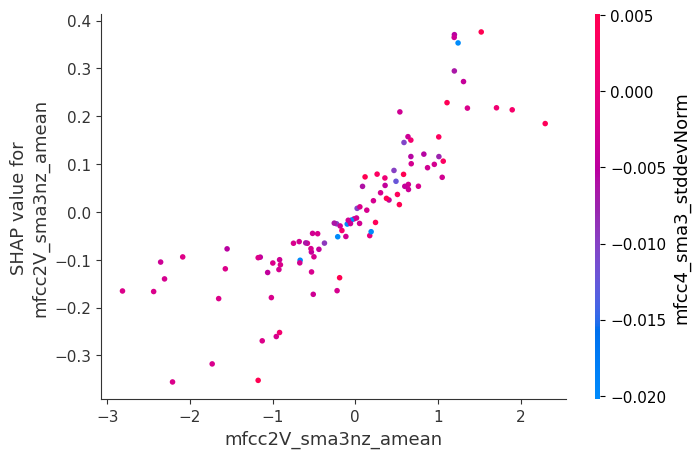

In [14]:
shap.dependence_plot('mfcc2V_sma3nz_amean', shap_values, X_test)

## Interpretabilité Locale

In [50]:
def shap_plot(j, df, shap_values, explainer):
    shap.initjs()
    p = shap.force_plot(explainer.expected_value, shap_values[j], df.iloc[j], matplotlib=True)
    return p

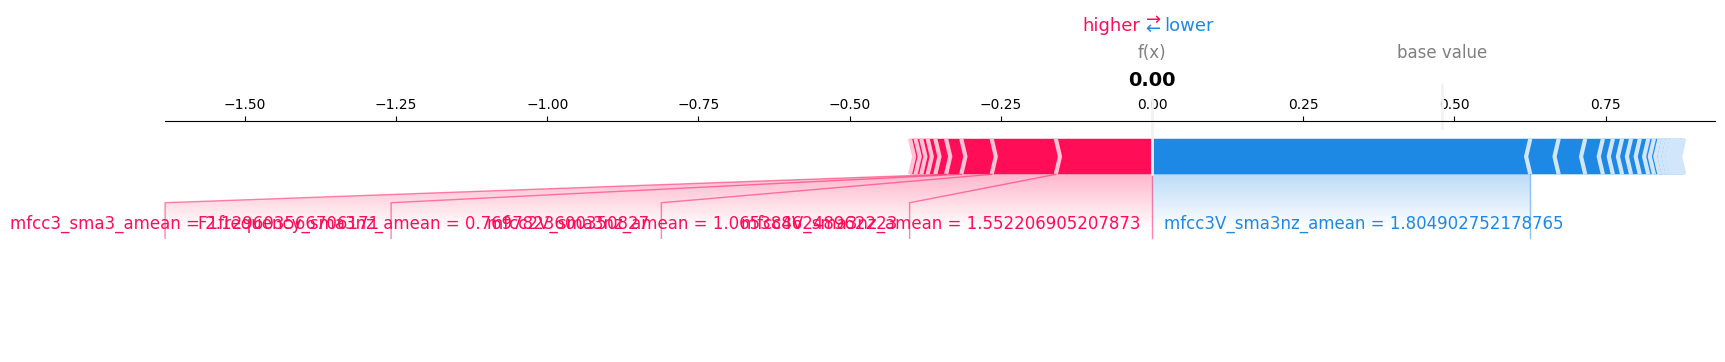

In [56]:
shap_plot(0, X_test, shap_values, explainer)

In [61]:
exp_shap_values.values.shape

(100, 88)

In [62]:
exp_shap_values.values

array([[-0.00288446,  0.        , -0.01161971, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00301649, -0.00304561,  0.07750029, ...,  0.00661189,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.0053748 , -0.00421646,  0.06840498, ...,  0.00589881,
         0.00201835,  0.00233615],
       [ 0.        ,  0.        , -0.00943037, ...,  0.00624143,
         0.00130508,  0.        ],
       [ 0.        ,  0.        ,  0.07606893, ...,  0.        ,
         0.00456332,  0.        ]])

In [63]:
shap_values

array([[ 0.        ,  0.        , -0.01482373, ..., -0.00904058,
         0.        ,  0.        ],
       [ 0.00399661, -0.00403376,  0.07212557, ..., -0.00373478,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.03034105, ..., -0.00669277,
         0.015348  ,  0.        ],
       ...,
       [ 0.01018997,  0.        ,  0.07698207, ...,  0.0075917 ,
         0.00466713, -0.0107007 ],
       [-0.00320197,  0.        , -0.00830238, ..., -0.00130065,
         0.        , -0.00274284],
       [ 0.        ,  0.00696394,  0.06490194, ...,  0.00466187,
        -0.00849209,  0.        ]])

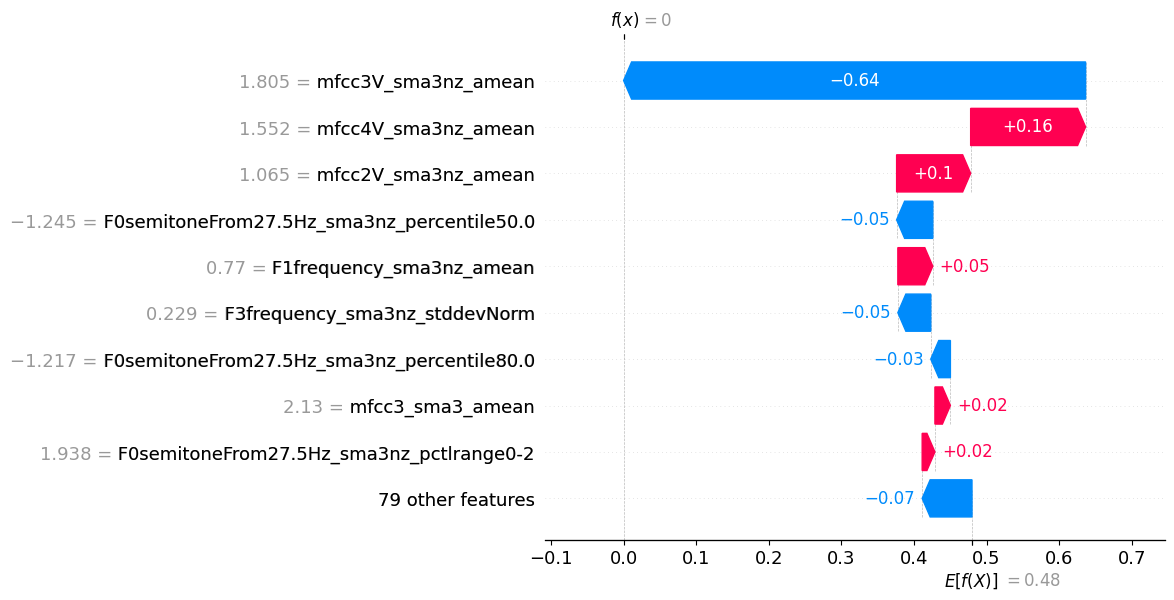

In [51]:
shap.plots.waterfall(exp_shap_values[0])

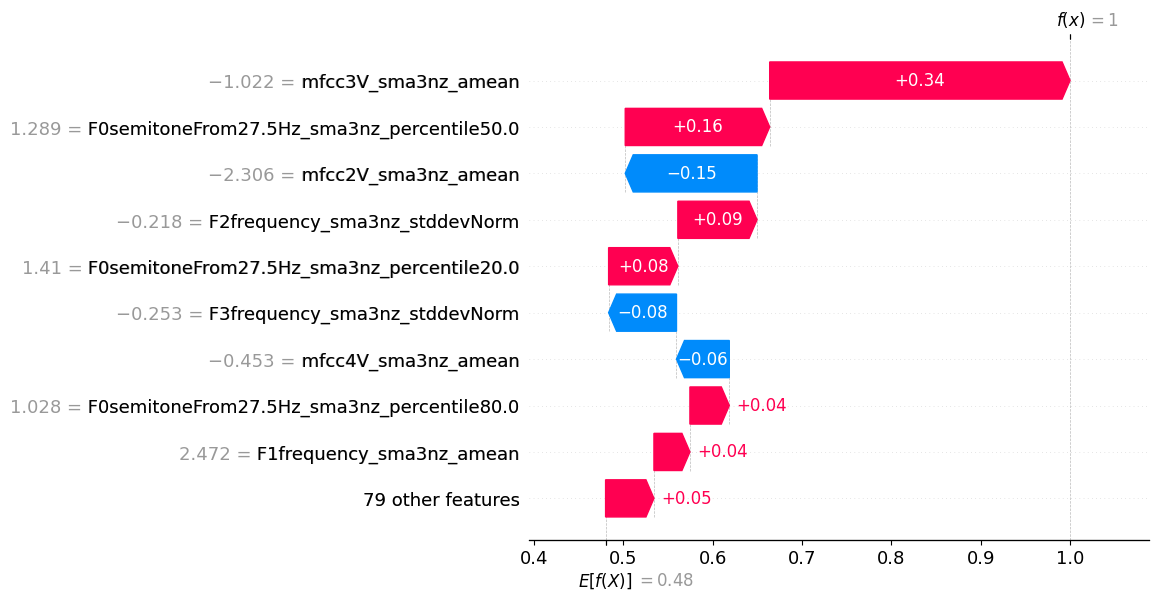

In [52]:
shap.plots.waterfall(exp_shap_values[1])

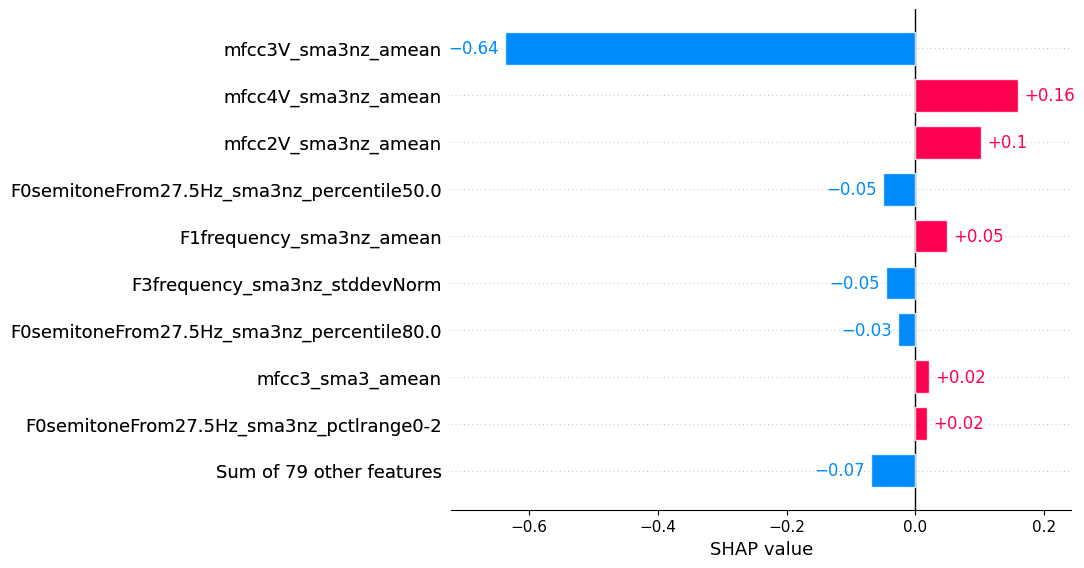

In [54]:
shap.plots.bar(exp_shap_values[0])

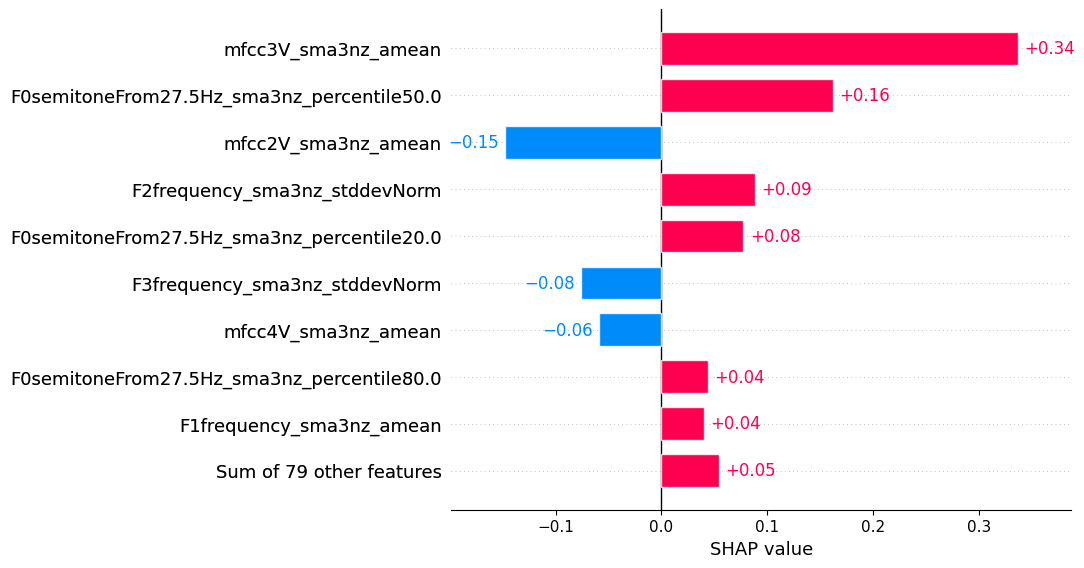

In [55]:
shap.plots.bar(exp_shap_values[1])

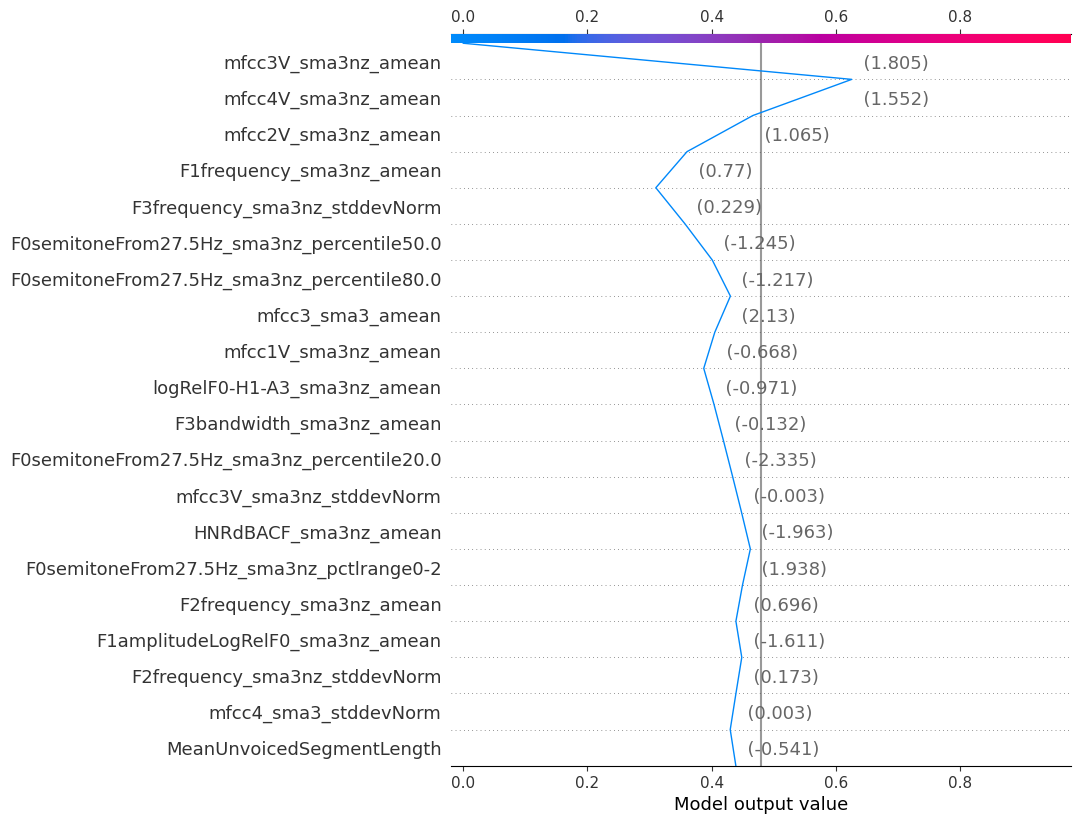

In [57]:
shap.decision_plot(explainer.expected_value, shap_values[0], X_test)